In [1]:
import pandas as pd
import matplotlib as mpl 
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('xg-data.csv')

In [4]:
df = df.sort_values(by=['team', 'minute'])

In [6]:
df

,Unnamed: 0,minute,team,xG,player,result
0,0,1,Arsenal,0.062124,Martin Ødegaard,SavedShot
1,1,5,Arsenal,0.493427,Granit Xhaka,MissedShots
3,3,10,Arsenal,0.520991,Gabriel Jesus,ShotOnPost
5,5,18,Arsenal,0.246104,Granit Xhaka,SavedShot
9,9,37,Arsenal,0.111806,Bukayo Saka,MissedShots
11,11,40,Arsenal,0.399629,Gabriel Jesus,ShotOnPost
13,13,43,Arsenal,0.414402,Martin Ødegaard,BlockedShot
15,15,48,Arsenal,0.630372,Gabriel Jesus,SavedShot
22,22,70,Arsenal,0.645159,Granit Xhaka,ShotOnPost
25,25,75,Arsenal,0.216905,Gabriel Jesus,SavedShot


In [7]:
away_xg = [0]
home_xg = [0]
away_min = [0]
home_min = [0]

# home and away team
hteam = df['team'].iloc[0]
ateam = df['team'].iloc[-1]

for i in range(len(df['xG'])):
    if df['team'][i] == ateam:
        away_xg.append(df['xG'][i])
        away_min.append(df['minute'][i])
        
    if df['team'][i] == hteam:
        home_xg.append(df['xG'][i])
        home_min.append(df['minute'][i])

In [14]:
def nums_cumilative_sum(nums_list):
    return [sum(nums_list[:i+1]) for i in range(len(nums_list))]

away_cummilative = nums_cumilative_sum(away_xg)
home_cummilative = nums_cumilative_sum(home_xg)

In [15]:
away_total = round(away_cummilative[-1], 2)
home_total = round(home_cummilative[-1],2)

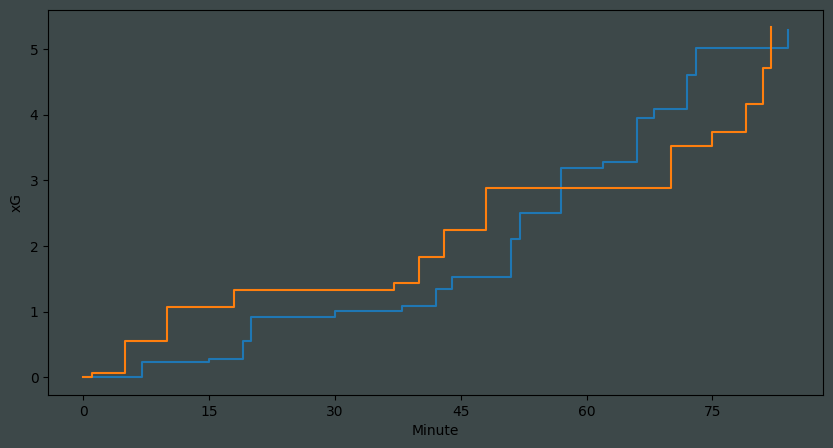

In [24]:
fig, ax = plt.subplots(figsize=(10,5))
fig.set_facecolor('#3d4849')
ax.patch.set_facecolor('#3d4849')

plt.xticks([0, 15, 30, 45, 60, 75, 90, 115])
plt.xlabel('Minute')
plt.ylabel('xG')

ax.step(x=away_min, y=away_cummilative, where='post')
ax.step(x=home_min, y=home_cummilative, where='post')